In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('spotifyData.csv', encoding='ISO-8859-1')
df.head()

,X,title,artist,top.genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,emo,ins
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97.0,89.0,67.0,NaN,8.0,80.0,217.0,19.0,4.0,83.0,16.920,92.16
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82.0,30.456,73.92
2,3,TiK ToK,Kesha,dance pop,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80.0,24.534,82.56
3,4,Bad Romance,Lady Gaga,dance pop,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,NaN,24.534,92.16
4,5,Just the Way You Are,Bruno Mars,pop,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78.0,48.222,92.16


In [3]:
df = df.drop(['X'], axis=1)

Amount of songs for each year

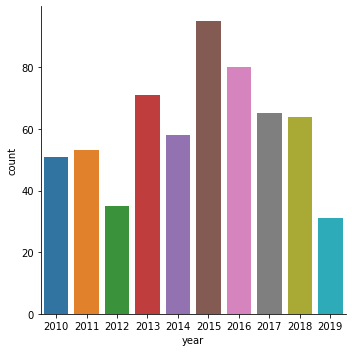

In [4]:
sns.catplot(x = 'year', data = df, kind = 'count')

Top of 10 genres from 2010 to 2019

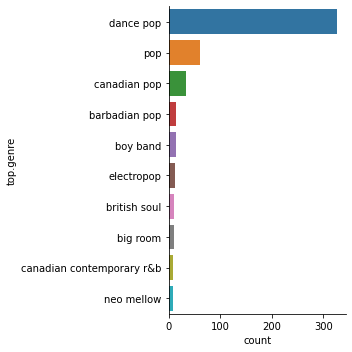

In [5]:
top = 10  #change this value to see another top 
sns.catplot(y = 'top.genre', data = df, kind = 'count', order= df['top.genre'].value_counts().index[:top])

Top of 3 genres from 2010 to 2019

In [6]:
counted_genre = df.groupby(['top.genre', 'year']).size().unstack(fill_value=0)

In [7]:
df1 = pd.DataFrame()
for i in list(counted_genre.columns):
    df2 = counted_genre[i].sort_values(ascending=False)[:3]
    dict = {'value': list(df2.values), 'genre': df2.index, 'year':i}
    tmp = pd.DataFrame(dict)
    df1 = df1.append(tmp, ignore_index=True)

<AxesSubplot:xlabel='year', ylabel='value'>

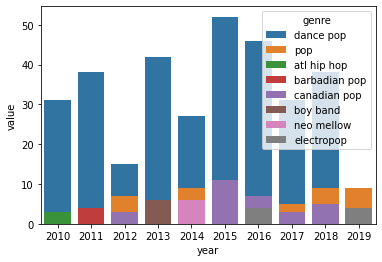

In [8]:
sns.barplot(data=df1, y = 'value', x='year', hue = 'genre', dodge=False)